In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/robertoeg/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv('scraped_news.csv')

In [3]:
# Load summarization and sentiment analysis models
# summarizer = pipeline("summarizationa", model="facebook/bart-large-cnn")
sentiment_analyzer = SentimentIntensityAnalyzer()

# Analyze each title
results = []
for idx, (_, row) in enumerate(df.iterrows()):
    title = row['title']
    description = row['description']

    # Sentiment Analysis
    sentiment_score = sentiment_analyzer.polarity_scores(title)['compound']
    sentiment_label = 'Positive' if sentiment_score > 0 else 'Negative'

    results.append((title, description, sentiment_score, sentiment_label))

# Convert results to DataFrame
analysis_df = pd.DataFrame(results, columns=['Title', 'Description', 'Sentiment Score', 'Sentiment Direction'])

# Display the table
print(analysis_df.head())

# Create an array with the sentiment scores
sentiment_scores = analysis_df['Sentiment Score']

# Create an array with the sentiment direction
sentiment_direction = analysis_df['Sentiment Direction']



                                               Title  \
0  Trump’s Abuse of Recount Funds Shows the Need ...   
1  Trump criticizes federal response to Ohio trai...   
2  Fani Willis is likely going to indict Trump so...   
3  Trump, after reported subpoena, defends keepin...   
4  Trump vows to 'stop' gender-affirming care for...   

                                         Description  Sentiment Score  \
0  Trump’s Abuse of Recount Funds Shows the Need ...          -0.2732   
1  Trump criticizes federal response to Ohio trai...          -0.3400   
2  Fani Willis is likely going to indict Trump so...           0.3612   
3  Trump, after reported subpoena, defends keepin...           0.0000   
4  Trump vows to 'stop' gender-affirming care for...           0.4939   

  Sentiment Direction  
0            Negative  
1            Negative  
2            Positive  
3            Negative  
4            Positive  


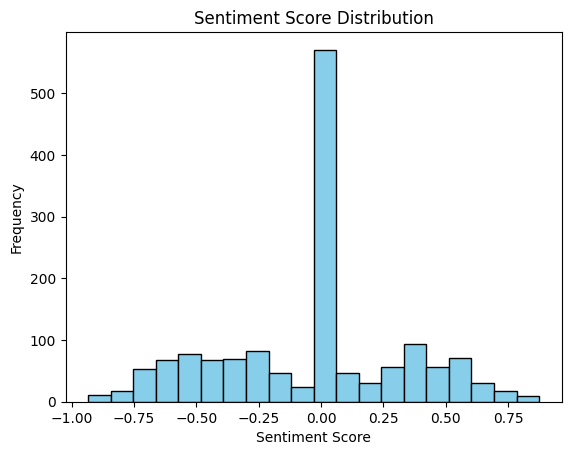

In [4]:
# Plot the sentiment Scores
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

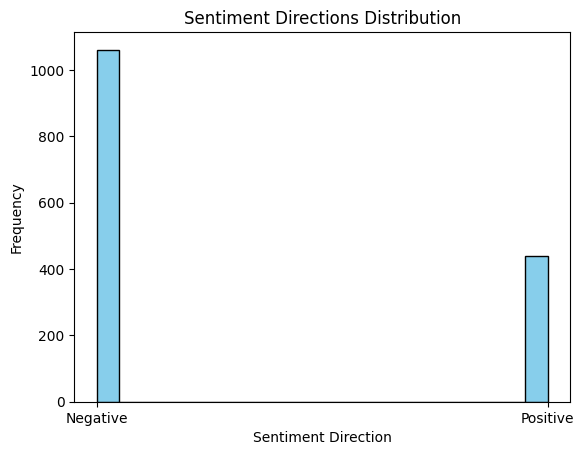

In [5]:
# Plot the sentiment Direction
plt.hist(sentiment_direction, bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Directions Distribution')
plt.xlabel('Sentiment Direction')
plt.ylabel('Frequency')
plt.show()